# Degrees That Pay You Back: A Clustering Analysis
<img src="college-salaries/salary.jpg" width="500">

## Introduction
Wondering if that Philosophy major will really help you pay the bills? Think you're set with an Engineering degree? Choosing a college major tends to be a complex decision evaluating personal interest, difficulty, and career potential. If you're curious about the potential short and long term financial implications of this _major_ decision, join me in applying a clustering analysis to explore salaries by college degree.

This project is based on the _Degrees That Pay You Back_ data referenced in the Wall Street Journal article _Ivy League's Big Edge: Starting Pay_: https://www.wsj.com/articles/SB121746658635199271. Similar further analysis could be done on the additional datasets available, examining salary potential based on the type and region of college attended. 

Let's start by loading in some relevant packages and importing the data.

In [33]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
## LOADING DATA
salary = pd.read_csv('college-salaries/degrees-that-pay-back.csv')
salary.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [15]:
salary.describe()

,Percent change from Starting to Mid-Career Salary
count,50.000000
mean,69.274000
std,17.909908
min,23.400000
25%,59.125000
50%,67.800000
75%,82.425000
max,103.500000


In [16]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
Undergraduate Major                                  50 non-null object
Starting Median Salary                               50 non-null object
Mid-Career Median Salary                             50 non-null object
Percent change from Starting to Mid-Career Salary    50 non-null float64
Mid-Career 10th Percentile Salary                    50 non-null object
Mid-Career 25th Percentile Salary                    50 non-null object
Mid-Career 75th Percentile Salary                    50 non-null object
Mid-Career 90th Percentile Salary                    50 non-null object
dtypes: float64(1), object(7)
memory usage: 3.2+ KB


In [17]:
##RENAME COLUMNS
salary = salary.rename(columns = {'Percent change from Starting to Mid-Career Salary' : 'percent_change',
                                  'Undergraduate Major' :'major',
                                 'Starting Median Salary': 'starting_median',
                                 'Mid-Career Median Salary' : 'mid_median',
                                 'Mid-Career 10th Percentile Salary':'mid_10',
                                 'Mid-Career 25th Percentile Salary':'mid_25',
                                 'Mid-Career 75th Percentile Salary':'mid_75',
                                 'Mid-Career 90th Percentile Salary':'mid_90'})
salary.head()

,major,starting_median,mid_median,percent_change,mid_10,mid_25,mid_75,mid_90
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [18]:
##CURRENCY TO NUMBER- NUMBER TO PERCENTAGE
salary[salary.columns[1:]] = salary[salary.columns[1:]].replace('[\$,]', '', regex=True).astype(float)
salary['percent_change'] = salary['percent_change']/100
salary.head()

,major,starting_median,mid_median,percent_change,mid_10,mid_25,mid_75,mid_90
0,Accounting,46000.0,77100.0,0.676,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,0.750,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,0.688,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,0.671,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,0.846,50600.0,62200.0,97000.0,136000.0


In [19]:
##Starting salary vs Mid-career Salary
highest_starting = salary['starting_median'].max()
highest_starting_major = salary[salary['starting_median'] == highest_starting]['major'].values[0]
lowest_starting = salary['starting_median'].min()
lowest_starting_major = salary[salary['starting_median'] == lowest_starting]['major'].values[0]
highest_mid = salary['mid_median'].max()
highest_mid_major = salary[salary['mid_median'] == highest_mid]['major'].values[0]
lowest_mid = salary['mid_median'].min()
lowest_mid_major = salary[salary['mid_median'] == lowest_mid]['major'].values[0]


print('The major that has the highest starting median salary is', highest_starting_major, ' with the salary of', '${0}'.format(format(highest_starting, ',.2f')))
print('The major that has the lowest starting median salary is', lowest_starting_major, ' with the salary of', '${0}'.format(format(lowest_starting, ',.2f')))
print('The major that has the highest mid-career median salary is', highest_mid_major, ' with the salary of', '${0}'.format(format(highest_mid, ',.2f')))
print('The major that has the lowest mid-career median salary is', lowest_mid_major, ' with the salary of', '${0}'.format(format(lowest_mid, ',.2f')))

The major that has the highest starting median salary is Physician Assistant  with the salary of $74,300.00
The major that has the lowest starting median salary is Spanish  with the salary of $34,000.00
The major that has the highest mid-career median salary is Chemical Engineering  with the salary of $107,000.00
The major that has the lowest mid-career median salary is Education  with the salary of $52,000.00


In [20]:
##Descriptive statistics 
salary.describe()

,starting_median,mid_median,percent_change,mid_10,mid_25,mid_75,mid_90
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,44310.000000,74786.00000,0.692740,43408.000000,55988.000000,102138.000000,142766.000000
std,9360.866217,16088.40386,0.179099,12000.779567,13936.951911,20636.789914,27851.249267
min,34000.000000,52000.00000,0.234000,26700.000000,36500.000000,70500.000000,96400.000000
25%,37050.000000,60825.00000,0.591250,34825.000000,44975.000000,83275.000000,124250.000000
50%,40850.000000,72000.00000,0.678000,39400.000000,52450.000000,99400.000000,145500.000000
75%,49875.000000,88750.00000,0.824250,49850.000000,63700.000000,118750.000000,161750.000000
max,74300.000000,107000.00000,1.035000,71900.000000,87300.000000,145000.000000,210000.000000


In [63]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(salary[['starting_median', 'mid_median']])
clusters = kmeans.predict(salary[['starting_median', 'mid_median']])

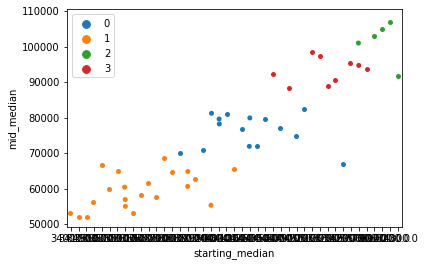

In [69]:
sns.stripplot(x='starting_median', y='mid_median', size=5, hue=clusters, data=salary)

In [70]:
salary['cluster'] = clusters

In [ ]:
# Top high paying major
salary[salary['cl']]['major']